In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('bikesharing_clean.csv')
data.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


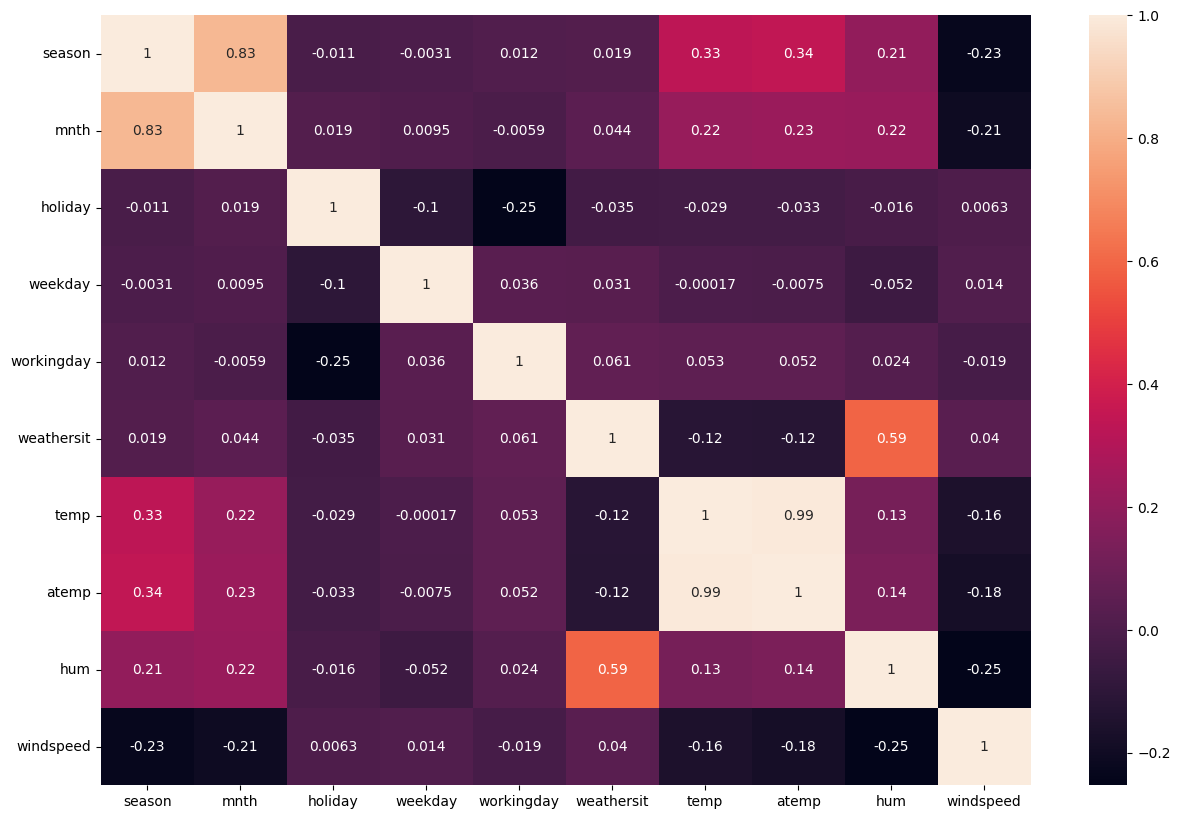

In [3]:
plt.figure(figsize=(15,10))
sns.heatmap(data.drop('cnt', axis=1).corr(numeric_only=True), annot=True)
plt.show()

We see from the correlation heatmap that there is some multicollinearity. Let's confirm this by calculating VIF for all columns.

#### VIF

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
X = data.drop('cnt', axis=1)
exog = np.c_[np.ones(X.shape[0]).reshape(-1,1), X]

vif = []
for i in range(10):
    vif.append(variance_inflation_factor(exog, i+1))

vif_mat = pd.DataFrame({'Features':X.columns,'VIF':vif}).sort_values(by='VIF', ascending=False)

vif_mat

,Features,VIF
7,atemp,64.343265
6,temp,63.317230
0,season,3.547489
1,mnth,3.332573
8,hum,1.888988
5,weathersit,1.744807
9,windspeed,1.197228
2,holiday,1.083084
4,workingday,1.076379
3,weekday,1.023842


In [6]:
X.columns[np.argmax(vif)]

'atemp'

We see that there is high multicollinearity as `atemp,temp` have very high VIF values which is expected as both increase together and both decrease together.

Let's take a threshold of 10 for VIF and remove features with VIF value higher than this.

In [7]:
X_vif = X.copy()

vif_max = 10

cols_dropped = []

while True:
    exog = np.c_[np.ones(X_vif.shape[0]).reshape(-1,1), X_vif]
    vif = [variance_inflation_factor(exog, i+1) for i in range(len(X_vif.columns))]
    if max(vif)<10:
        break
    else:
        cols_dropped.append(X_vif.columns[np.argmax(vif)])
        X_vif.drop(X_vif.columns[np.argmax(vif)], axis=1, inplace=True)







In [8]:
X_vif

,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed
0,1,1,0,6,0,2,0.344167,0.805833,0.160446
1,1,1,0,0,0,2,0.363478,0.696087,0.248539
2,1,1,0,1,1,1,0.196364,0.437273,0.248309
3,1,1,0,2,1,1,0.200000,0.590435,0.160296
4,1,1,0,3,1,1,0.226957,0.436957,0.186900
...,...,...,...,...,...,...,...,...,...
726,1,12,0,4,1,2,0.254167,0.652917,0.350133
727,1,12,0,5,1,2,0.253333,0.590000,0.155471
728,1,12,0,6,0,2,0.253333,0.752917,0.124383
729,1,12,0,0,0,1,0.255833,0.483333,0.350754


In [9]:
exog = np.c_[np.ones(X_vif.shape[0]).reshape(-1,1), X_vif]
vif = [variance_inflation_factor(exog, i+1) for i in range(len(X_vif.columns))]
vif

[np.float64(3.5405118259135246),
 np.float64(3.3310341844737787),
 np.float64(1.0813959543216294),
 np.float64(1.021226841525299),
 np.float64(1.0763246746116342),
 np.float64(1.7376199906288416),
 np.float64(1.2101995683490616),
 np.float64(1.8757676392971154),
 np.float64(1.1631554080011535)]

In [10]:
cols_dropped

['atemp']

Only one column `atemp` was dropped and that brought down max VIF to 3.54